# Chapter 2 Problems #

1.  A regular polygon is a closed polygon which is equilateral and equiangular--that is, all sides have the same length and all angles have the same measure. (See [this page](https://en.wikipedia.org/wiki/Regular_polygon).)  Your task is to define a class RegularPolygon(n, s), where the objects represent regular polygons, where n >2 is the number of sides and s is the length of a given side.  You should include the following methods which perform the following computations:

+ a method .perimeter() which returns the perimeter of the polygon
+ a method .area() which returns the area of the polygon
+ a method .angle() which returns the size (in radians of each angle)
+ a method .plot() which produces a plot of the polygon (The code below may be helpful)

**Note:**  The *Cartesian coordinate system* plots points on the plane using $(x,y)$, where $x$ and $y$ are the perpendicular distance to the axes.  The [polar coordinate system](https://tutorial.math.lamar.edu/classes/calcii/polarcoordinates.aspx) instead plots each point on the plane using two numbers $(r, \theta)$, where $\theta$ represents the angle made with the positive $x$-axis and $r$ represents the distance from the point to the origin. matplotlib can plot polar points using a 'polar projection'.  See the code below. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
myangles = np.linspace(0, 2*np.pi, 6) 
myangles

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       6.28318531])

In [6]:
myradii = np.ones(6)
myradii

array([1., 1., 1., 1., 1., 1.])

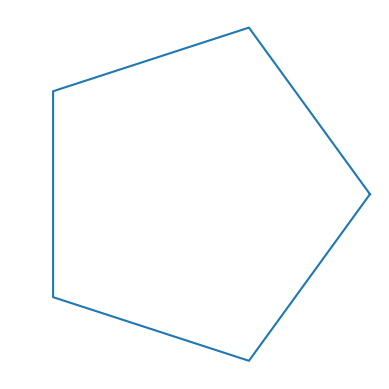

In [9]:
ax = plt.subplot(projection='polar')
ax.plot(myangles, myradii) # The variables represent theta and r, not x and y
ax.axis('off')  # Try it without this to see the effect
plt.show()

2. Consider the function $f(x,y) = x^2 - 6x + y^2 - 4 y + 13$.

+ Produce a plot of this function on the region $0 \le x \le 5, 0 \le y \le 5$. 
+ Use calculus to find the location of the minimum of this function.  (Just tell me the coordinates (x,y) of the minimum; no need to show work.)
+ Create a function graddescent(point, n, eta), which starts at a point  (that is, np.array([x.y])) and does n iterations of the gradient descent algorithm using learning rate $\eta$, printing an estimate of the local minimum at each step and returning the last estimate of the local minimum.
+ Starting with the point $(2,4)$ find (1) $n$ and $\eta$ so that graddescent converges to the minimum and (2) $n$ and $\eta$ so that graddescent does not converge to the minimum

3. The code presented in the textbook can be found on the author's [github repository](https://github.com/rasbt/machine-learning-book) as a Jupyter notebook.  In particular, the code for the object-oriented implementation of the perceptron algorithm can be found in the file ch02.ipynb. On the class [github page](https://github.com/aleahy-work/CS-STAT323-W24) is the file 'jan8separate.csv', which contains 100 observations of a dataset consisting of $(x_1, x_2, x_3, y)$, where $(x_1, x_2, x_3)$ is a point and $y$ is a value $-1$ or $1$. 

+ Use this data and the object-oriented Perceptron code to produce a fitted model for the data.  You can choose the values of $\eta$, $n$, and the random state for defining the Perceptron class. 

**Note:** The Perceptron.fit() method takes data in the form X,y, where X is a matrix with each row representing an input $(x_1, x_2, x_3)$ and $y$ is the output indicator variable.  Also, recall that the indicator variable is {0,1}, **not** {-1,1}, like we used.  You should (1) import the data with numpy.genfromtxt(), split the columns into an X and y piece, and finally use numpy.where() to convert the -1,1 values into 0,1 values.

+ Use the Perceptron.predict() method to determine the number of errors in your model by looking at the difference between your predicted outcomes ($\hat y$) and the actual outcomes ($y$).  The nump.count_nonzero() method may be helpful.


# Key #

## Problem 1 ##

In [41]:
import numpy as np
import matplotlib.pyplot as plt

class RegularPolygon:
    
    def __init__(self, n, s):
        self.n = n
        self.s = s

    def perimeter(self):
        return self.n * self.s

    def area(self):
        return 1/4 * self.n * self.s**2 /np.tan(np.pi/self.n)

    def angle(self):
        return (self.n - 2) * np.pi/self.n  # Radians!

    def plot(self):
        myangles = np.linspace(0, 2*np.pi, self.n + 1)
        myradii = self.s * (1/np.tan(np.pi/self.n)) * np.ones(self.n + 1)
        ax = plt.subplot(projection='polar')
        ax.plot(myangles, myradii)
        ax.axis('off')
        plt.show()
        

In [44]:
hexagon = RegularPolygon(5,1)

In [45]:
hexagon.perimeter()

5

In [46]:
hexagon.area()

1.720477400588967

In [47]:
hexagon.angle()

1.8849555921538759

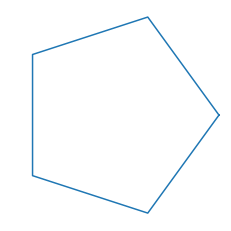

In [48]:
hexagon.plot()

## Problem 2 ##

In [54]:
myx = np.arange(0,5,.1)
myy = np.arange(0,5,.1)
xv, yv = np.meshgrid(myx,myy)
myz =xv**2 - 6*xv + yv**2 - 4*yv + 13

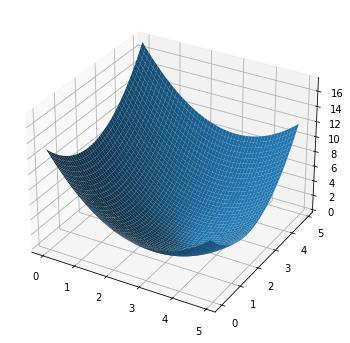

In [55]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, yv, myz)
plt.show()

The minimum is found by determining where $\nabla f = 0$.  This is $(3,2)$. 

In [56]:
def graddescent( point, n, eta):
    for i in range(n):
        point = point - eta*np.array([2*point[0] - 6, 2*point[1] - 4])
        print(point)

In [60]:
graddescent( np.array([2,4]), 25, .1)

[2.2 3.6]
[2.36 3.28]
[2.488 3.024]
[2.5904 2.8192]
[2.67232 2.65536]
[2.737856 2.524288]
[2.7902848 2.4194304]
[2.83222784 2.33554432]
[2.86578227 2.26843546]
[2.89262582 2.21474836]
[2.91410065 2.17179869]
[2.93128052 2.13743895]
[2.94502442 2.10995116]
[2.95601953 2.08796093]
[2.96481563 2.07036874]
[2.9718525 2.056295 ]
[2.977482 2.045036]
[2.9819856 2.0360288]
[2.98558848 2.02882304]
[2.98847078 2.02305843]
[2.99077663 2.01844674]
[2.9926213 2.0147574]
[2.99409704 2.01180592]
[2.99527763 2.00944473]
[2.99622211 2.00755579]


In [61]:
graddescent( np.array([2,4]), 25, 1)

[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]
[2 4]
[4 0]


## Problem 3 ##

In [62]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [63]:
mydata = np.genfromtxt("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/jan8separate.csv", delimiter=',')

In [64]:
X = mydata[:,0:3]

In [65]:
y = mydata[:,3]

In [66]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [67]:
myy = np.where(y <= 0, 0, 1)

In [68]:
myy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
mypercept = Perceptron(.1, 30, 1)

In [70]:
mymodel = mypercept.fit(X,myy)

In [71]:
myyat = mymodel.predict(X)

In [72]:
myy - myyat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
np.count_nonzero(myy - myyat)

0

In [74]:
myp2 = Perceptron(1, 1,1)

In [75]:
mymodel2 = mypercept.fit(X,myy)

In [76]:
myyat = mymodel.predict(X)

In [77]:
myyat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
myy - myyat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])